k sources, l rounds (k <= l)

Li: 除去 i - 1 round leaves后剩下的node i<= l
Bi: 距离burned过的nodes为1的nodes

R1 = L1/B1 
...
Rl = Ll/Bl


get matrix, k , l
S0: initialize Ri by Li


In [1]:
import networkx as nx
from numpy.linalg import matrix_power
import numpy as np
import matplotlib.pyplot as plt
import copy as cp

#### 0 transfrom

In [3]:
#generate
g = nx.random_tree(20)
# to adj matrix
A = nx.adjacency_matrix(g)
A = A.todense()
A = np.array(A)

## S0: build graph

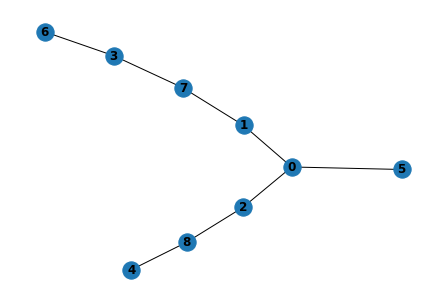

In [2]:
# generate
N = 9
g = nx.random_tree(N)
g_copy = cp.deepcopy(g)
# draw 
nx.draw(g, with_labels=True, font_weight='bold')
plt.show()

## S1.1 Initialize Llist

In [3]:
k = 3
l = 3
#1. list detect whether all nodes are visited

L_list = []
'''
notimportant = range(N)
L_list.append(notimportant)
L_list
'''

'\nnotimportant = range(N)\nL_list.append(notimportant)\nL_list\n'

## S1.2 makeLL

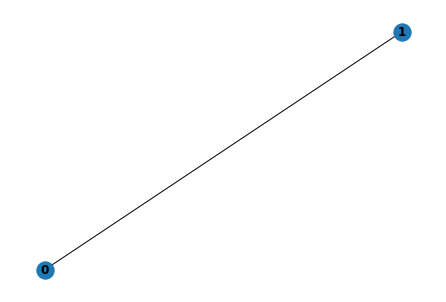

' '

In [4]:
def updateL(input, g):
    '''
    input: all vertex this level 
    1. get all leaves
    2. delete all leaves
    '''
    #S1 get all leaves
    temp = [x for x in g.nodes() if g.degree(x)==1]
    #S2.1 remove leaves from graph
    for i in range(len(temp)):
        g.remove_node(temp[i])
    #S2.2 return all non-leaves 
    return [x for x in input if x not in temp]


g = cp.deepcopy(g_copy) #0 copy original graph
initial = range(N) 
for i in range(l): # who decide rounds??: l
    leaves = updateL(initial, g) #get leaves left over
    initial = cp.deepcopy(leaves)
    
    L_list.append(initial)
    #print(leaves, len(leaves))
L_list
''' '''#uncomment to show process graphs
nx.draw(g, with_labels=True, font_weight='bold')
plt.show()
''' '''

In [6]:
# reverse so the order is: 1st source, 2nd source, ... , kth source
L_list.reverse()
L_list


[[0, 1, 2, 3, 7, 8], [0, 1, 2, 7], [0, 1]]

## S2.0 initialize R and source

In [7]:
'''
1.source：
每当找到一个source， 就更新里面的数值； 如果全burn了， 就返回source 因为他就是burning sequence
tip： 设计一个best sequence（最短的），不能burn了返回
2. visited：这个图的每个node有没有被burn（也可以不用）
 0: visited; 1: unvisited 
'''
source = -1*np.ones(k)
visited = np.ones([N]) # 0: visited; 1: unvisited 
source

array([-1., -1., -1.])

## S2.1 update R[i+1] based on R[i]

In [8]:


#get B 
def findB(burned, gg):
    '''
    burned: burned nodes in the last round； 截至到上一回合，已经被burn的nodes， 应该是list进来
    gg: graph 我们的总图
    '''
    nodes_toremove = cp.copy(burned)
    # find all bunred vertice's neignbors
    for i in range(burned):
        nb_of_source = nx.all_neighbors(gg, burned[i])
        
        for x in nb_of_source:
            if x not in nodes_toremove: # keep unique
                nodes_toremove.append(x)
    
    return nodes_toremove #返回B set


In [26]:

#S1 initialize
R_dynamic = [cp.copy(L_list[0])] # list for dynamic R
level = [] # record all burned

bestsequence = [[], 0]# need update
burned = []
l_round = l
g2 = cp.copy(g_copy) #copy original graph
#Mark = [np.ones(len(L_list[0]))] # visited signal of dynamic R

def updateR(num):
    # 0 judge and recursion
    if len(R_dynamic[num]) == 0: #this row does not exist
        if i == 0: 
            return bestsequence
        else:
            # Walk up
            R_dynamic.remove(R_dynamic[num])
            level.remove(level[num - 1])
            l_round = l_round + 1
            updateR(num - 1)
  
    #this_burned = []
    # 1. pick burn and remove 
    source[num] = R_dynamic[num][0]
    R_dynamic.remove(R_dynamic[num][0])
    burned.append(source[num])
    #this_burned.append(source[num])
    
    # 2. update R
    
    # 2.1 get all burned nodes(B) in this round
    B = findB(burned, g2)
    
    # 2.2 update level
    if len(level) == 0:
        level.append(B)
    else:
        level.append([node for node in B if node not in level[num - 1]])
    
    burned = B#因为就相当于都被burn了
    
    # 2.2 get L/B and update to the total R
    temp = [node for node in L_list[num] if node not in B]
    R_dynamic.append(temp)
    
    # 3. Walk down: if have not reach the k-1 level to next level(0, 1, ..., k-2, k-1)
    l_round = l_round - 1
    if num < k - 2: 
        updateR(num + 1)
    

#start of alogrithm
updateR(0)
while True:
    #oldburned = burned
    while len(R_dynamic[k - 1]) != 0:
        source[k - 1] = R_dynamic[k - 1][0] # pick 1st 
        R_dynamic[k-1].remove(R_dynamic[k - 1][0]) #remove 1st
        
        burned.append(source[k-1]) 
        B = burned
        
        #burned B for rest rounds
        for rest_rounds in range(l_round):
            B = findB(B)
        
        if len(B) == N:
            print(source)
            break
            #return source
        burned.remove(source[k-1])
        if bestsequence[1] < len(B):
            bestsequence[0] = source     
    R_dynamic.remove(R_dynamic[k - 1])         
    level.remove(level[k-1])
    updateR(k-2)

'''
     if len(R_dynamic[num]) == 0:
        if i == 0: 
            return bestsequence
        else:
            Mark.remove(Mark[num])
            R_dynamic.remove(R_dynamic[num])
            updateR(num - 1)
     if sum(Mark[num]) == 0:
        if i == 0: 
            return bestsequence
        else:# WWWW: walk up
            Mark.remove(Mark[num])
            R_dynamic.remove(R_dynamic[num])
            updateR(num - 1)           
    
 '''
 # burn for l rounds?
 # remove burn
      

IndexError: list index out of range


for col in range(k):#col traversal
    
    if R_dynamic[0] == []:
        continue
    source[k] = L_list[k][0]
    
#initialize source1
source[0] = L_list[0][0] #record source1
Mark[0][0] = 0 #visit source1
R_dynamic[0].remove(source[0]) #remove

g2 = cp.copy(g_copy) #复制一份原图，专门来用
B = findB(source[0], g2)
R_dynamic.append([node for node in L_list[1] if node not in B])
#for i in range(k):
    

'''
for i in range(k): #pick k sources
    for j in range(R_list[i]):
'''  
    
print(source, Mark, B)
R_dynamic

In [21]:
A = []
B = [A, 2]
B[0]
B[0] = np.array([1,2,3])
B[0] = np.array([1,2])
B[1] = [A, 2]
for i in range(5):
    B.append([A, 2])
B[0:3]


[array([1, 2]), [[], 2], [[], 2]]

In [27]:
def isklburnable(g, k, l):
    '''
    g: graph with networkx form
    k: number of sources
    l: number of rounds
    '''
    
    # Step0: get information
    N = nx.number_of_nodes(g)
    g_copy = cp.deepcopy(g)
    ''' '''
    #tip1: uncomment to draw origin graph
    print("input graph:")
    nx.draw(g, with_labels=True, font_weight='bold')
    plt.show()
    ''' '''
    
    # Step1: get L
    L_list = []
    
    def updateL(input, g):
        #S1 get all leaves
        temp = [x for x in g.nodes() if g.degree(x)==1]
        #S2.1 remove leaves from graph
        for i in range(len(temp)):
            g.remove_node(temp[i])
        #S2.2 return all non-leaves 
        return [x for x in input if x not in temp]
    
    
    gl = cp.deepcopy(g_copy) #used for l
    initial = range(N) 
    
    for i in range(l): # who decide rounds??: l
        leaves = updateL(initial, gl) #get leaves left over
        initial = cp.deepcopy(leaves)
    
        L_list.append(initial)
    
    L_list.reverse()
    L_list = L_list[0:k] #only get 1st k rows
    ''' '''
    #tip2: uncomment to show process graphs
    nx.draw(gl, with_labels=True, font_weight='bold')
    plt.show()
    print(L_list)
    ''' '''
    

input graph:


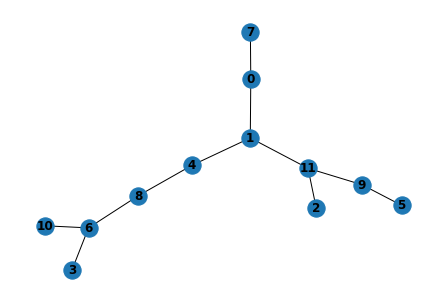

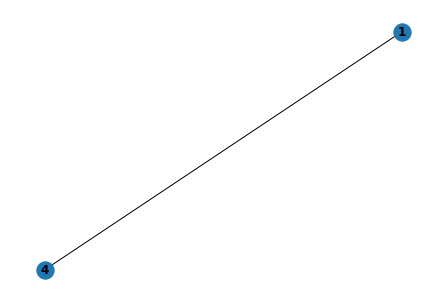

[[1, 4], [1, 4, 8, 11], [0, 1, 4, 6, 8, 9, 11]]


In [28]:
g = nx.random_tree(12)
isklburnable(g, 4, 3)

In [64]:
def isklburnable(g, k, l):
    '''
    g: graph with networkx form
    k: number of sources
    l: number of rounds
    '''
    
    ################## Step0: get information
    N = nx.number_of_nodes(g)
    g_copy = cp.deepcopy(g)
    ''' '''
    #tip1: uncomment to draw origin graph
    print("input graph")
    nx.draw(g, with_labels=True, font_weight='bold')
    plt.show()
    ''' '''
    
    ################## Step1: get L
    L_list = []
    
    def updateL(input, g):
        #S1 get all leaves
        temp = [x for x in g.nodes() if g.degree(x)==1]
        #S2.1 remove leaves from graph
        for i in range(len(temp)):
            g.remove_node(temp[i])
        #S2.2 return all non-leaves 
        return [x for x in input if x not in temp]
    
    gl = cp.deepcopy(g_copy) #used for l
    initial = range(N) 
    
    for i in range(l): # who decide rounds??: l
        leaves = updateL(initial, gl) #get leaves left over
        initial = cp.deepcopy(leaves)
    
        L_list.append(initial)
    
    L_list.reverse()
    L_list = L_list[0:k] #only get 1st k rows
    ''' 
    #tip2: uncomment to show process graphs
    print("rest graph")
    nx.draw(gl, with_labels=True, font_weight='bold')
    plt.show()
    ''' 
    
    ################## Step2
    
    def findB(burned, gg):
        '''
        input: 
        a) burned: list of burned nodes
        b) gg: total graph
        output:
        nodes_burned_till_this_round
        '''
        nodes_burned_till_this_round = cp.copy(burned)
        # find all bunred vertice's neignbors
        for this_node in burned:
            nb_of_source = nx.all_neighbors(gg, this_node)
            
            for x in nb_of_source:
                if x not in nodes_burned_till_this_round: # keep unique
                    nodes_burned_till_this_round.append(x)
    
        return nodes_burned_till_this_round #返回B set
    
    source = -1*np.ones(k) #burnding sequence
    bestsequence = [[], 0] #1st entry: burning sequence; 2nd: number of burned nodes by this bs
    
    R_dynamic = [cp.copy(L_list[0])]
    burned = []
    #old_burned = []
    level_burned = [] 
    
    l_round = l - k
    ''' '''
    print("start here")
    print("R ini")
    print(R_dynamic)
    
    
    ''' '''
    def updateR(num, burned):
        # 0 judge and recursion
        
        print("loop")
        print(num, "time", burned, "\n")
        
        print(R_dynamic[num])
        if len(R_dynamic[num]) == 0: #this row does not exist
            if num == 0:
                return 
                #return bestsequence[0]
            else:
            # Walk up
                print("go up")
                print(R_dynamic)
                print(level_burned)
                R_dynamic.remove(R_dynamic[num])
                level_burned.remove(level_burned[num - 1])
                #l_round = l_round + 1
                upburned = []
                for i in level_burned:
                    upburned = upburned + i
                
                updateR(num - 1, upburned)
  
        
        # 1. pick burn and remove 
        source[num] = R_dynamic[num][0]
        R_dynamic[num].remove(R_dynamic[num][0])
        old_burned = cp.copy(burned)
        burned.append(source[num])
        
    
        # 2. update R
    
        # 2.1 get all burned nodes(B) in this round
        B = findB(burned, g)
        
        print(burned)
        print(B)
        print("\n")
        
        # PS: 也可以让findB只返回新burn的vertices
        # 2.2 burn
        if len(level_burned) == 0:
            level_burned.append(B)
        else:
            level_burned.append([node for node in B if node not in old_burned])
        burned = B #update burn
    
    
        # 2.2 get L/B and update to the total R
        temp = [node for node in L_list[num] if node not in B]
        R_dynamic.append(temp)
        
        
        print("go down")
        print(R_dynamic)
        print(level_burned)
        # 3. Walk down: if have not reach the k-1 level， to next level(0, 1, ..., k-2, k-1)
        # l_round = l_round - 1
        if num < k - 2: 
            updateR(num + 1, burned)
            
        return burned
    ####### process:
    burned = updateR(0, burned)
    while len(R_dynamic[0]) != 0:
        while len(R_dynamic[k - 1]) != 0:
            source[k - 1] = R_dynamic[k - 1][0] # pick 1st 
            R_dynamic[k-1].remove(R_dynamic[k - 1][0]) #remove 1st
        
            burned.append(source[k-1]) 
            B = burned
        
            #burned B for rest rounds
            for rest_rounds in range(l_round):
                B = findB(B)
        
            if len(B) == N:
                return source
            
            burned.remove(source[k-1])
            
            if bestsequence[1] < len(B):
                bestsequence[0] = source     
        R_dynamic.remove(R_dynamic[k - 1])         
        level_burned.remove(level_burned[k-1])
        updateR(k-2, burned)   
        
        ''' '''
        print(L_list)
        print(R_dynamic)
        print(burned)
        print(level_burned)
        
        ''' '''
    return bestsequence[0]

input graph


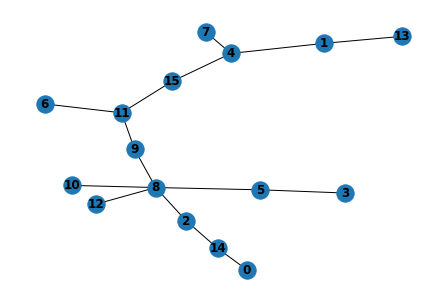

start here
R ini
[[9, 11]]
loop
0 time [] 

[9, 11]
[9.0]
[9.0, 8, 11]


go down
[[11], []]
[[9.0, 8, 11]]
loop
1 time [9.0, 8, 11] 

[]
go up
[[11], []]
[[9.0, 8, 11]]
loop
0 time [] 

[11]
[11.0]
[11.0, 6, 9, 15]


go down
[[], []]
[[11.0, 6, 9, 15]]
loop
1 time [11.0, 6, 9, 15] 

[]
go up
[[], []]
[[11.0, 6, 9, 15]]
loop
0 time [] 

[]


IndexError: list index out of range

In [65]:
g = nx.random_tree(16)
isklburnable(g, 4, 4)

In [49]:
A = [[1,3],[4,8]]
B = []
B = B + A[0] + A[1]
B

[1, 3, 4, 8]